Predicted affordable units for 2027: 2773 units
Predicted affordable units for 2028: 3123 units
Predicted affordable units for 2029: 3472 units
Predicted affordable units for 2030: 3822 units
Predicted affordable units for 2031: 4172 units


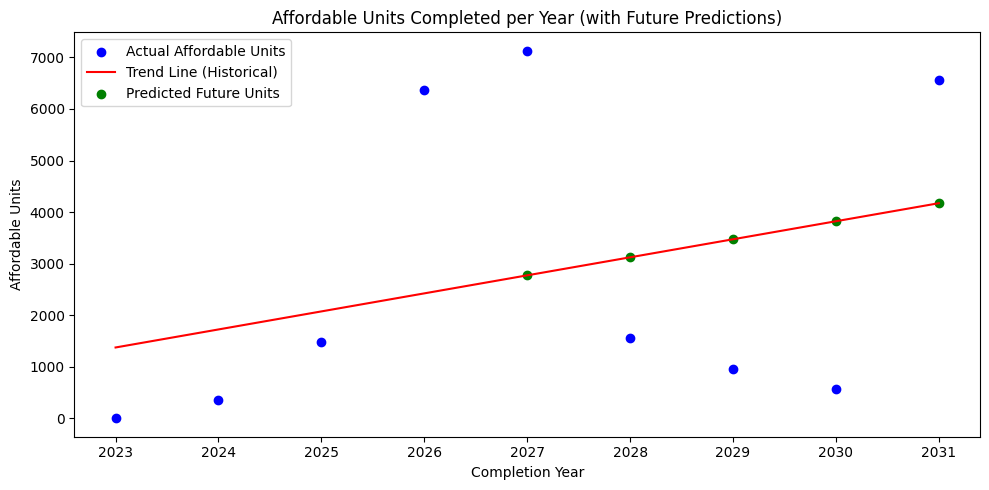

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load and clean the dataset
df = pd.read_csv("421-a_16__Affordable_New_York_Housing_Program_Completion_Extension_-_Letters_of_Intent_20250422.csv")
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Convert relevant columns
df["REPORTED_ANTICIPATED_COMPLETION_DATE"] = pd.to_datetime(df["REPORTED_ANTICIPATED_COMPLETION_DATE"], errors="coerce")
df["REPORTED_AFFORDALE_UNITS"] = pd.to_numeric(df["REPORTED_AFFORDALE_UNITS"], errors="coerce")

# Extract the completion year
df["COMPLETION_YEAR"] = df["REPORTED_ANTICIPATED_COMPLETION_DATE"].dt.year

# Group data by year
yearly_units = df.groupby("COMPLETION_YEAR")["REPORTED_AFFORDALE_UNITS"].sum().dropna()

# Prepare the X and y for the model
X = yearly_units.index.values.reshape(-1, 1)  # years
y = yearly_units.values  # affordable units

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for future years (2027–2031)
future_years = np.array([2027, 2028, 2029, 2030, 2031]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Display predictions
for year, units in zip(future_years.flatten(), future_predictions):
    print(f"Predicted affordable units for {year}: {int(units)} units")

# Plot actual vs. predicted
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Affordable Units", color="blue")
plt.plot(X, model.predict(X), color="red", label="Trend Line (Historical)")
plt.scatter(future_years, future_predictions, color="green", label="Predicted Future Units")
plt.title("Affordable Units Completed per Year (with Future Predictions)")
plt.xlabel("Completion Year")
plt.ylabel("Affordable Units")
plt.legend()
plt.tight_layout()
plt.show()
